In [1]:
%matplotlib inline

In [2]:
from deepjets.models import get_maxout, load_model, save_model
from deepjets.learning import prepare_datasets, test_model, train_model
from keras.optimizers import Adam
from sklearn import cross_validation
from sklearn.metrics import auc, roc_curve
import h5py
import itertools
import matplotlib.pyplot as plt
import numpy as np

Using Theano backend.


In [3]:
model = get_maxout(25**2)

In [4]:
n_images = 1000       # number of signal/background images to be loaded
n_folds = 2         # number of k-folds for train/test splitting
val_frac = 0.1      # fraction of n_train reserved for validation
batch_size = 32     # batch size to use in training
sig_file = 'images/w_shrink_1p2.h5'
bkd_file = 'images/qcd_shrink_1p2.h5'

In [ ]:
with h5py.File(sig_file, 'r') as h5file:
    h5file.

In [5]:
kf_files = prepare_datasets(
    sig_file, bkd_file, out_file_name='datasets/train_test',
    n_sig=n_images, n_bkd=n_images, n_folds=n_folds,
    shuffle=True, shuffle_seed=1)

In [6]:
train_model(model, kf_files[0], batch_size)

Epoch 1/100...
Epochs w/o increase = 0, AUC = 2.09406918561
Epoch 2/100...
Epochs w/o increase = 0, AUC = 3.6819222487
Epoch 3/100...
Epochs w/o increase = 0, AUC = 5.79796569741
Epoch 4/100...
Epochs w/o increase = 0, AUC = 5.82282030659
Epoch 5/100...
Epochs w/o increase = 1, AUC = 5.34844134661
Epoch 6/100...
Epochs w/o increase = 2, AUC = 5.23428453195
Epoch 7/100...
Epochs w/o increase = 3, AUC = 5.19158358505
Epoch 8/100...
Epochs w/o increase = 4, AUC = 5.00860106348
Epoch 9/100...
Epochs w/o increase = 5, AUC = 4.91020595752
Epoch 10/100...
Epochs w/o increase = 6, AUC = 4.84135847423
Epoch 11/100...
Epochs w/o increase = 7, AUC = 4.79597252458
Epoch 12/100...
Epochs w/o increase = 8, AUC = 4.78408058179
Epoch 13/100...
Epochs w/o increase = 9, AUC = 4.76163448747
Epoch 14/100...
Epochs w/o increase = 10, AUC = 4.75063716399
Patience tolerance reached
Training complete


Score    = 0.522353523016
AUC      = 20.4830926076
Accuracy = 38115/50000 = 0.7623


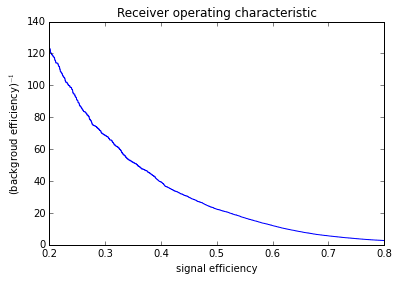

In [7]:
test_model(model, kf_files[0], batch_size)